In [ ]:
import pickle
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense,Conv2D, MaxPool2D
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  

In [ ]:
pickle_in = open("train_images.pickle","rb")
train_images = pickle.load(pickle_in)

In [ ]:
pickle_in = open("train_labels.pickle","rb")
train_labels = pickle.load(pickle_in)

In [ ]:
pickle_in = open("validation_images.pickle","rb")
validation_images = pickle.load(pickle_in)

In [ ]:
pickle_in = open("validation_labels.pickle","rb")
validation_labels = pickle.load(pickle_in)

In [ ]:
pickle_in = open("test_images.pickle","rb")
test_images = pickle.load(pickle_in)

In [ ]:
pickle_in = open("test_labels.pickle","rb")
test_labels = pickle.load(pickle_in)

In [ ]:
train_labels = to_categorical(train_labels)

In [ ]:
vgg19 = keras.applications.vgg19
conv_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100,activation=keras.layers.LeakyReLU(alpha=0.3))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(50,activation=keras.layers.LeakyReLU(alpha=0.3))(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(3,activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input,outputs=predictions)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
full_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
for layer in conv_model.layers:
    layer.trainable = False

In [ ]:
full_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
full_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])  

In [ ]:
history = full_model.fit(train_images,train_labels,batch_size=32,epochs=7,validation_data=(validation_images,validation_labels))

Epoch 1/7
94/94 [==============================] - 19s 204ms/step - loss: 0.9604 - acc: 0.9360 - val_loss: 1.6302 - val_acc: 0.8933
Epoch 2/7
94/94 [==============================] - 17s 178ms/step - loss: 0.1191 - acc: 0.9867 - val_loss: 4.0419 - val_acc: 0.8933
Epoch 3/7
94/94 [==============================] - 17s 182ms/step - loss: 0.0648 - acc: 0.9923 - val_loss: 5.8108 - val_acc: 0.8933
Epoch 4/7
94/94 [==============================] - 17s 183ms/step - loss: 0.0538 - acc: 0.9963 - val_loss: 4.7185 - val_acc: 0.8933
Epoch 5/7
94/94 [==============================] - 17s 185ms/step - loss: 0.0483 - acc: 0.9967 - val_loss: 5.4333 - val_acc: 0.8933
Epoch 6/7
94/94 [==============================] - 17s 185ms/step - loss: 0.0326 - acc: 0.9957 - val_loss: 6.5125 - val_acc: 0.8933
Epoch 7/7
94/94 [==============================] - 18s 187ms/step - loss: 0.0150 - acc: 0.9983 - val_loss: 5.6465 - val_acc: 0.8933


In [ ]:
full_model.evaluate(test_images,test_labels)

10/10 [==============================] - 1s 143ms/step - loss: 0.6826 - acc: 0.9800


[0.6825999021530151, 0.9800000190734863]

In [ ]:
full_model.save('vgg19.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('vgg19.h5',custom_objects={'LeakyReLU':keras.layers.LeakyReLU})

In [ ]:
def prepare(filepath):
    IMG_SIZE = 224  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
prediction = np.argmax(model.predict([prepare('Figure.jpg')]),axis=-1)

In [ ]:
CATEGORIES = ["Basket", "Coin", "Figure"]

In [ ]:
print(CATEGORIES[int(prediction)])

Figure


In [ ]:
print('test images', test_images)
preds = np.round(model.predict(test_images),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test images [[[[182 173 170]
   [182 173 170]
   [182 173 170]
   ...
   [186 177 174]
   [186 177 174]
   [186 177 174]]

  [[182 173 170]
   [182 173 170]
   [182 173 170]
   ...
   [186 177 174]
   [186 177 174]
   [186 177 174]]

  [[182 173 170]
   [182 173 170]
   [182 173 170]
   ...
   [186 177 174]
   [186 177 174]
   [186 177 174]]

  ...

  [[183 173 173]
   [184 174 174]
   [185 175 175]
   ...
   [181 176 175]
   [181 176 175]
   [181 176 175]]

  [[183 173 173]
   [184 174 174]
   [185 175 175]
   ...
   [181 176 175]
   [181 176 175]
   [181 176 175]]

  [[183 173 173]
   [184 174 174]
   [185 175 175]
   ...
   [181 176 175]
   [181 176 175]
   [181 176 175]]]


 [[[169 158 160]
   [169 158 160]
   [169 158 160]
   ...
   [170 159 161]
   [170 159 161]
   [170 159 161]]

  [[169 158 160]
   [169 158 160]
   [169 158 160]
   ...
   [170 159 161]
   [170 159 161]
   [170 159 161]]

  [[169 158 160]
   [169 158 160]
   [169 158 160]
   ...
   [170 159 161]
   [170 159 161]

In [ ]:
animals = ['Basket', 'Coin', 'Figure']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

      Basket       1.00      0.96      0.98       100
        Coin       0.98      0.98      0.98       100
      Figure       0.96      1.00      0.98       100

   micro avg       0.98      0.98      0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300
 samples avg       0.98      0.98      0.98       300



In [ ]:
categorical_test_labels = to_categorical(categorical_test_labels)
categorical_preds = to_categorical(categorical_preds)

In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


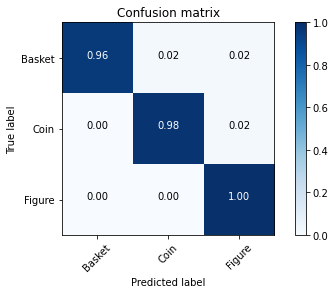

In [ ]:
plot_confusion_matrix(confusion_matrix, ['Basket', 'Coin', 'Figure'],normalize=True)